In [1]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\hyeonu\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [267]:
df1 = pd.read_csv('C:/1차data/1-8기최종.csv', encoding="cp949",index_col=0)
df1

,고객번호,증감확인,성별,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,RFM등급,식료품_NET,식료품_ABS,...,편의품_CV_S,선매품CV_S,전문품CV_S,기타CV_S,매출증감지수,객단가증감률,A_구매금액,B_구매금액,C_구매금액,D_구매금액
0,1,0,2.156039,1.998229,3.784157,-0.652472,-0.424659,1.4,0,4,...,0.206334,-0.790094,0.267363,-0.849117,-1.388013,-0.670022,0.929296,-0.248486,-0.120202,-0.127978
1,2,0,2.156039,1.998229,1.828781,-0.652472,-0.424659,1.9,0,2,...,0.129422,-0.835259,0.948328,0.225322,-0.690965,-0.670022,1.229972,-0.274863,-0.193895,0.715572
2,3,0,2.156039,1.998229,-0.405935,-0.652472,-0.424659,2.3,0,0,...,-0.079951,2.588805,-0.976372,-1.599918,-1.620363,0.000107,-0.443446,-0.284499,0.040243,-0.127978
3,4,0,-0.463814,1.998229,0.432083,-0.652472,-0.424659,3.0,0,4,...,-0.449221,-0.516154,1.449001,-0.660012,0.703133,-0.670022,-0.203454,-0.206219,-0.132425,-0.127978
4,6,1,-0.463814,1.998229,-0.405935,-0.652472,-0.424659,2.5,2,8,...,-0.158058,-1.144311,0.199393,-1.238202,-1.155664,-1.340151,-0.186322,0.131975,-0.155648,-0.127978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,-0.463814,-2.144017,-0.405935,1.068660,-0.084953,3.0,0,4,...,0.660101,1.414476,-0.976372,-0.718081,-1.155664,-0.670022,-0.400862,-0.233634,-0.191939,3.564123
18862,19334,0,2.156039,-1.108456,7.974248,1.068660,-0.424659,1.6,-1,5,...,1.414923,0.745889,-0.976372,0.075304,0.935482,-2.010280,-0.437690,0.258621,-0.134567,-0.127978
18863,19335,1,-0.463814,-1.108456,-0.405935,1.068660,-0.424659,2.8,1,5,...,-0.371639,-0.424077,-0.976372,0.292020,1.167832,0.670236,-0.423405,0.389109,-0.070952,-0.127978
18864,19336,1,-0.463814,-1.108456,-0.405935,-0.652472,-0.424659,1.9,0,0,...,3.101738,-0.421960,0.305254,-0.728735,0.703133,-0.670022,0.061776,-0.283601,-0.193895,0.039023


<AxesSubplot:>

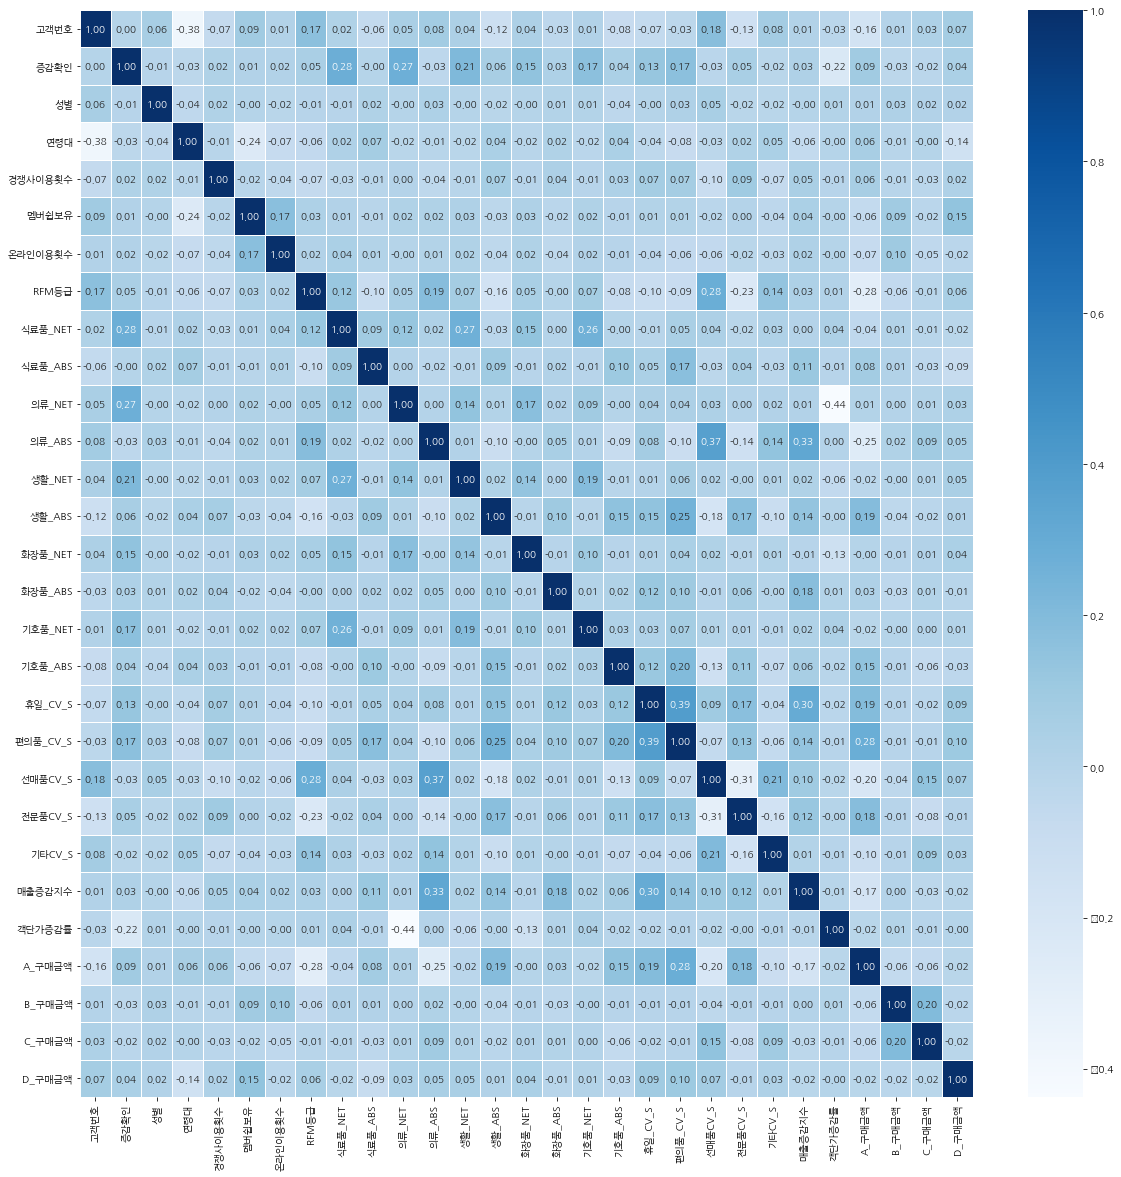

In [335]:
plt.figure(figsize=(20,20))
sns.heatmap(data =df1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [290]:


X=df1.drop(['고객번호','증감확인'],axis=1)

y=df1[['증감확인']]

scaler = StandardScaler()

for i in X.columns:
    X[[f'{i}']]=scaler.fit_transform(X[[f'{i}']])

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=3)


X

,성별,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,RFM등급,식료품_NET,식료품_ABS,의류_NET,의류_ABS,...,편의품_CV_S,선매품CV_S,전문품CV_S,기타CV_S,매출증감지수,객단가증감률,A_구매금액,B_구매금액,C_구매금액,D_구매금액
0,2.156039,1.998229,3.784157,-0.652472,-0.424659,-1.754621,-0.378043,0.367476,-0.005168,-1.473442,...,0.206334,-0.790094,0.267363,-0.849117,-1.388013,-0.670022,0.929296,-0.248486,-0.120202,-0.127978
1,2.156039,1.998229,1.828781,-0.652472,-0.424659,-0.822823,-0.378043,-0.476547,1.000053,-1.033802,...,0.129422,-0.835259,0.948328,0.225322,-0.690965,-0.670022,1.229972,-0.274863,-0.193895,0.715572
2,2.156039,1.998229,-0.405935,-0.652472,-0.424659,-0.077385,-0.378043,-1.320570,-0.005168,-0.594163,...,-0.079951,2.588805,-0.976372,-1.599918,-1.620363,0.000107,-0.443446,-0.284499,0.040243,-0.127978
3,-0.463814,1.998229,0.432083,-0.652472,-0.424659,1.227132,-0.378043,0.367476,-0.005168,-0.594163,...,-0.449221,-0.516154,1.449001,-0.660012,0.703133,-0.670022,-0.203454,-0.206219,-0.132425,-0.127978
4,-0.463814,1.998229,-0.405935,-0.652472,-0.424659,0.295334,1.485112,2.055523,1.000053,-0.154524,...,-0.158058,-1.144311,0.199393,-1.238202,-1.155664,-1.340151,-0.186322,0.131975,-0.155648,-0.127978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,-0.463814,-2.144017,-0.405935,1.068660,-0.084953,1.227132,-0.378043,0.367476,-1.010390,-1.033802,...,0.660101,1.414476,-0.976372,-0.718081,-1.155664,-0.670022,-0.400862,-0.233634,-0.191939,3.564123
18862,2.156039,-1.108456,7.974248,1.068660,-0.424659,-1.381902,-1.309620,0.789488,1.000053,-0.154524,...,1.414923,0.745889,-0.976372,0.075304,0.935482,-2.010280,-0.437690,0.258621,-0.134567,-0.127978
18863,-0.463814,-1.108456,-0.405935,1.068660,-0.424659,0.854413,0.553534,0.789488,-1.010390,-0.154524,...,-0.371639,-0.424077,-0.976372,0.292020,1.167832,0.670236,-0.423405,0.389109,-0.070952,-0.127978
18864,-0.463814,-1.108456,-0.405935,-0.652472,-0.424659,-0.822823,-0.378043,-1.320570,2.005275,0.285115,...,3.101738,-0.421960,0.305254,-0.728735,0.703133,-0.670022,0.061776,-0.283601,-0.193895,0.039023


In [179]:
# rf_clf = RandomForestClassifier(n_jobs=-1)
# rf_clf.fit(X_train,y_train)
# print(round(accuracy_score(y_test,rf_clf.predict(X_test)),3))


# # # pred = rf_clf.predict(X_tr)
# # # accuracy = accuracy_score(y_test,pred)
# # # accuracy




# # # params = {
# # #     'n_estimators':[50,100],
# # #     'max_depth' : [6,8,10,12],
# # #    'min_samples_leaf' : [8,12,18],
# # #     'min_samples_split' : [8,14,20]
# # # }
# # # grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
# # # grid_cv.fit(X_train,y_train)


# # # print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
# # # print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


In [270]:
lst=[]
for i in range(1000):
    rf_clf = RandomForestClassifier(n_jobs=-1,random_state=i)
    rf_clf.fit(X_train,y_train)
    print(i,'번째',accuracy_score(y_test,rf_clf.predict(X_test)))
    aa=accuracy_score(y_test,rf_clf.predict(X_test))
    lst.append(aa)

0 번째 0.7204557498675146
1 번째 0.7225755166931638
2 번째 0.7239003709591945


KeyboardInterrupt: 

In [291]:

def est(y_test,pred,pred_proba):
    con=confusion_matrix(y_test,pred)
    acc=accuracy_score(y_test,pred)
    pre=precision_score(y_test,pred)
    rec=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    roc=roc_auc_score(y_test,pred_proba)
    print('오차행렬\n',con.round(3))
    print('정확도 :',acc.round(3))
    print('정밀도 :',pre.round(3))
    print('재현율 :',rec.round(3))
    print('f1점수:',f1.round(3))
    print('roc_auc :',roc.round(3))
    print()
    print()
    
    
 
rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
pred_proba = rf_clf.predict_proba(X_test)[:,1]
print('랜덤포레스트')
est(y_test,pred,pred_proba)

                                                                  
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
print('로지스틱회귀')
est(y_test,pred,pred_proba)

lgbm_wrapper = LGBMClassifier(n_estimators=100)
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train, y_train, eval_set=evals, verbose=False)
pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]
print('LGBM')
est(y_test,pred,pred_proba)


evals = [(X_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train,y_train, early_stopping_rounds = 100, eval_set=evals, eval_metric='logloss', verbose=False)
pred = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
print('XGB')
est(y_test,pred,pred_proba)


결정트리
오차행렬
 [[1470  668]
 [ 714  922]]
정확도 : 0.634
정밀도 : 0.58
재현율 : 0.564
f1점수: 0.572
roc_auc : 0.626


랜덤포레스트
오차행렬
 [[1739  399]
 [ 640  996]]
정확도 : 0.725
정밀도 : 0.714
재현율 : 0.609
f1점수: 0.657
roc_auc : 0.791


로지스틱회귀
오차행렬
 [[1684  454]
 [ 659  977]]
정확도 : 0.705
정밀도 : 0.683
재현율 : 0.597
f1점수: 0.637
roc_auc : 0.774


LGBM
오차행렬
 [[1691  447]
 [ 558 1078]]
정확도 : 0.734
정밀도 : 0.707
재현율 : 0.659
f1점수: 0.682
roc_auc : 0.801


XGB
오차행렬
 [[1705  433]
 [ 599 1037]]
정확도 : 0.727
정밀도 : 0.705
재현율 : 0.634
f1점수: 0.668
roc_auc : 0.804




In [664]:
len(rf_clf.feature_importances_)

38

Index(['성별', '연령대', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수', 'RFM등급', '식료품_NET',
       '식료품_ABS', '의류_NET', '의류_ABS', '생활_NET', '생활_ABS', '화장품_NET', '화장품_ABS',
       '기호품_NET', '기호품_ABS', '휴일_CV_S', '편의품_CV_S', '선매품CV_S', '전문품CV_S',
       '기타CV_S', '매출증감지수', '객단가증감률'],
      dtype='object')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

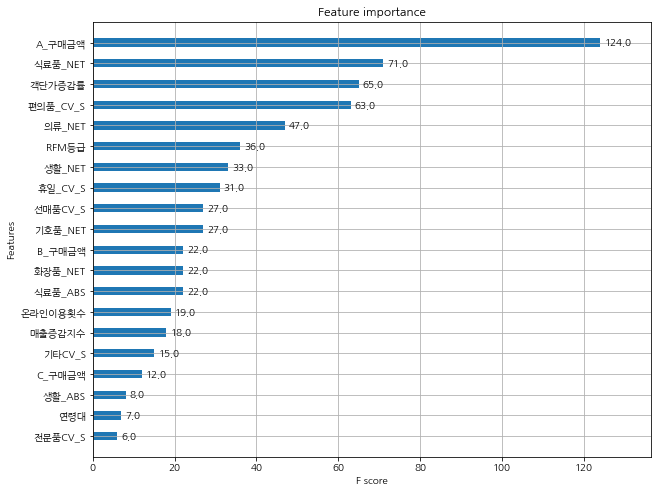

In [292]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_wrapper, ax=ax , max_num_features=20,height=0.4)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

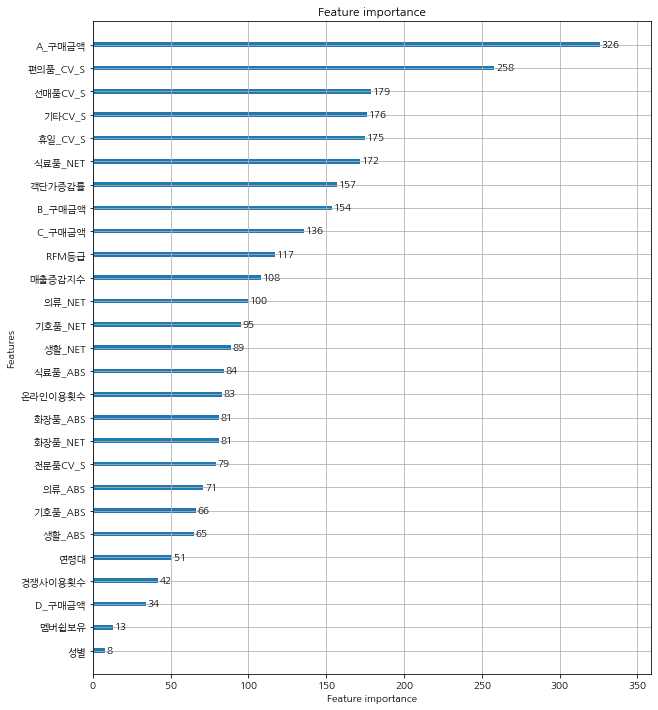

In [293]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

In [306]:
X=df1[['고객번호','A_구매금액','기타CV_S','증감확인', '식료품_NET',
     '의류_NET', '생활_NET','RFM등급', 
      '휴일_CV_S', '편의품_CV_S', '선매품CV_S',
       '객단가증감률','B_구매금액','C_구매금액']]
X

,고객번호,A_구매금액,기타CV_S,증감확인,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액
0,1,0.929296,-0.849117,0,0,0,-4,1.4,0.534529,0.206334,-0.790094,-0.670022,-0.248486,-0.120202
1,2,1.229972,0.225322,0,0,1,0,1.9,0.403153,0.129422,-0.835259,-0.670022,-0.274863,-0.193895
2,3,-0.443446,-1.599918,0,0,0,0,2.3,0.668476,-0.079951,2.588805,0.000107,-0.284499,0.040243
3,4,-0.203454,-0.660012,0,0,0,-1,3.0,0.619182,-0.449221,-0.516154,-0.670022,-0.206219,-0.132425
4,6,-0.186322,-1.238202,1,2,1,1,2.5,0.534952,-0.158058,-1.144311,-1.340151,0.131975,-0.155648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,-0.400862,-0.718081,0,0,-1,-1,3.0,0.375562,0.660101,1.414476,-0.670022,-0.233634,-0.191939
18862,19334,-0.437690,0.075304,0,-1,1,0,1.6,0.574768,1.414923,0.745889,-2.010280,0.258621,-0.134567
18863,19335,-0.423405,0.292020,1,1,-1,1,2.8,0.472426,-0.371639,-0.424077,0.670236,0.389109,-0.070952
18864,19336,0.061776,-0.728735,1,0,2,3,1.9,0.478711,3.101738,-0.421960,-0.670022,-0.283601,-0.193895


In [307]:
X=X[X['증감확인']==0]
X['고객번호']

,고객번호,A_구매금액,기타CV_S,증감확인,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액
0,1,0.929296,-0.849117,0,0,0,-4,1.4,0.534529,0.206334,-0.790094,-0.670022,-0.248486,-0.120202
1,2,1.229972,0.225322,0,0,1,0,1.9,0.403153,0.129422,-0.835259,-0.670022,-0.274863,-0.193895
2,3,-0.443446,-1.599918,0,0,0,0,2.3,0.668476,-0.079951,2.588805,0.000107,-0.284499,0.040243
3,4,-0.203454,-0.660012,0,0,0,-1,3.0,0.619182,-0.449221,-0.516154,-0.670022,-0.206219,-0.132425
8,10,-0.372333,-0.178393,0,0,0,0,1.8,0.244338,-1.292360,-0.309260,0.000107,-0.159392,0.682482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18854,19325,-0.230169,0.147817,0,0,0,-1,2.7,0.721548,1.097787,0.259730,0.670236,-0.259116,-0.193253
18855,19327,-0.444462,2.437714,0,0,1,0,2.1,0.535001,0.574083,2.658574,-0.670022,-0.280802,0.359896
18860,19332,-0.440903,2.437714,0,1,1,0,2.6,0.658519,0.082950,1.370420,1.340365,-0.275204,0.803287
18861,19333,-0.400862,-0.718081,0,0,-1,-1,3.0,0.375562,0.660101,1.414476,-0.670022,-0.233634,-0.191939


In [300]:
scaler = StandardScaler()
X=X.drop(['고객번호','증감확인'],axis=1)
for i in X.columns:
    X[[f'{i}']]=scaler.fit_transform(X[[f'{i}']])
X

,A_구매금액,기타CV_S,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액
0,1.367753,-0.840909,-0.144455,0.238970,-3.296500,-1.739425,-0.015794,0.382423,-0.803469,-0.912943,-0.214188,-0.135190
1,1.776146,0.201445,-0.144455,1.282634,-0.051626,-0.792279,-0.488643,0.298866,-0.848143,-0.912943,-0.234609,-0.205711
2,-0.496782,-1.569289,-0.144455,0.238970,-0.051626,-0.034562,0.466305,0.071407,2.538651,-0.203346,-0.242069,0.018349
3,-0.170812,-0.657451,-0.144455,0.238970,-0.862844,1.291443,0.288886,-0.329763,-0.532511,-0.912943,-0.181465,-0.146886
8,-0.400193,-0.190214,-0.144455,0.238970,-0.051626,-0.981708,-1.060247,-1.245738,-0.327869,-0.203346,-0.145213,0.632941
...,...,...,...,...,...,...,...,...,...,...,...,...
18854,-0.207098,0.126255,-0.144455,0.238970,-0.862844,0.723155,0.657320,1.350886,0.234927,0.506252,-0.222418,-0.205096
18855,-0.498162,2.347770,-0.144455,1.282634,-0.051626,-0.413420,-0.014097,0.781941,2.607661,-0.912943,-0.239206,0.324242
18860,-0.493328,2.347770,0.854647,1.282634,-0.051626,0.533726,0.430470,0.248380,1.333528,1.215849,-0.234873,0.748546
18861,-0.438943,-0.713786,-0.144455,-0.804693,-0.862844,1.291443,-0.587946,0.875390,1.377105,-0.912943,-0.202690,-0.203839


<AxesSubplot:>

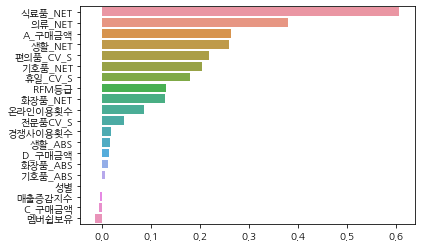

In [296]:
coef = pd.Series(lr_clf.coef_ [0], index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)


<AxesSubplot:>

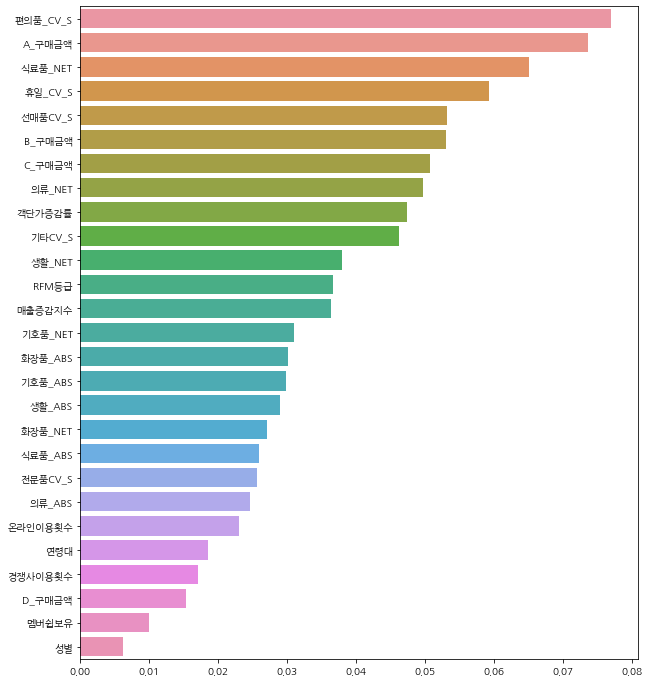

In [295]:
feature_series = pd.Series(data=rf_clf.feature_importances_, index=X.columns )
feature_series = feature_series.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 12))
sns.barplot(x= feature_series, y=feature_series.index)

In [118]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

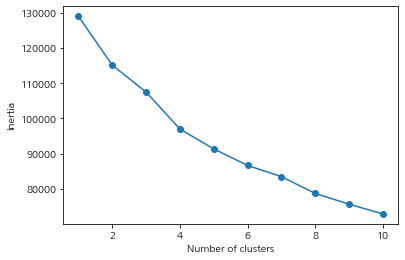

In [286]:
inertia = []
for i in range(1, 11):
    kmeans_plus = KMeans(n_clusters=i, init='k-means++')
    kmeans_plus.fit(X)
    inertia.append(kmeans_plus.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [297]:
for i in X.columns:
    X[f'{i}'] = np.log1p(X[f'{i}'])
X.fillna(0,inplace=True)
X

,성별,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,RFM등급,식료품_NET,식료품_ABS,의류_NET,의류_ABS,...,편의품_CV_S,선매품CV_S,전문품CV_S,기타CV_S,매출증감지수,객단가증감률,A_구매금액,B_구매금액,C_구매금액,D_구매금액
0,1.149318,1.098022,1.565310,-1.056909,-0.552792,0.000000,-0.474884,0.312967,-0.005182,0.000000,...,0.187586,-1.561094,0.236939,-1.891250,0.000000,-1.108731,0.657155,-0.285666,-0.128063,-0.136940
1,1.149318,1.098022,1.039846,-1.056909,-0.552792,-1.730606,-0.474884,-0.647308,0.693174,0.000000,...,0.121706,-1.803379,0.666972,0.203203,-1.174299,-1.108731,0.801989,-0.321395,-0.215542,0.539746
2,1.149318,1.098022,-0.520767,-1.056909,-0.552792,-0.080543,-0.474884,0.000000,-0.005182,-0.901804,...,-0.083328,1.277819,-3.745315,0.000000,0.000000,0.000107,-0.585991,-0.334772,0.039455,-0.136940
3,-0.623273,1.098022,0.359130,-1.056909,-0.552792,0.800715,-0.474884,0.312967,-0.005182,-0.901804,...,-0.596421,-0.725989,0.895680,-1.078845,0.532469,-1.108731,-0.227471,-0.230947,-0.142053,-0.136940
4,-0.623273,1.098022,-0.520767,-1.056909,-0.552792,0.258769,0.910318,1.116951,0.693174,-0.167855,...,-0.172044,0.000000,0.181816,0.000000,0.000000,0.000000,-0.206190,0.123964,-0.169186,-0.136940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,-0.623273,0.000000,-0.520767,0.726901,-0.088780,0.800715,-0.474884,0.312967,0.000000,0.000000,...,0.506878,0.881482,-3.745315,-1.266137,0.000000,-1.108731,-0.512264,-0.266095,-0.213118,1.518226
18862,1.149318,0.000000,2.194359,0.726901,-0.552792,0.000000,0.000000,0.581929,0.693174,-0.167855,...,0.881668,0.557264,-3.745315,0.072604,0.660356,0.000000,-0.575701,0.230017,-0.144525,-0.136940
18863,-0.623273,0.000000,-0.520767,0.726901,-0.552792,0.617568,0.440533,0.581929,0.000000,-0.167855,...,-0.464641,-0.551781,-3.745315,0.256207,0.773727,0.512965,-0.550615,0.328663,-0.073594,-0.136940
18864,-0.623273,0.000000,-0.520767,-1.056909,-0.552792,-1.730606,-0.474884,0.000000,1.100369,0.250848,...,1.411411,-0.548112,0.266398,-1.304660,0.532469,-1.108731,0.059943,-0.333518,-0.215542,0.038281


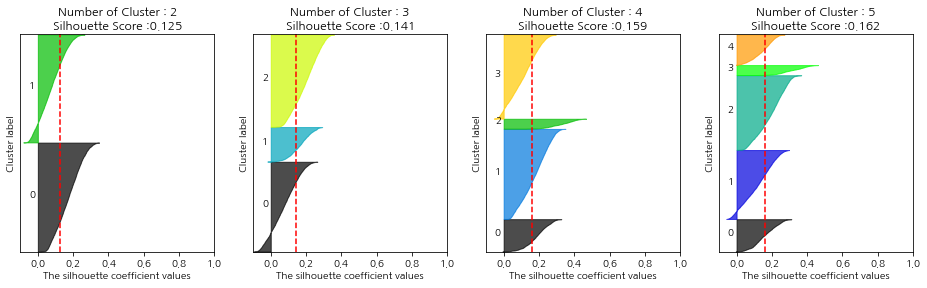

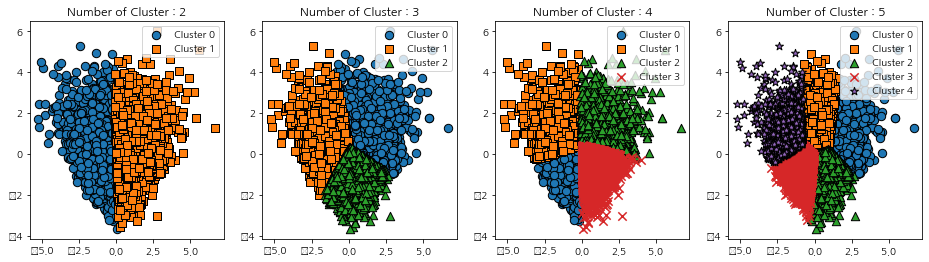

In [289]:
visualize_silhouette([2,3,4,5], X)
visualize_kmeans_plot_multi([2,3,4,5],X)

In [317]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
X['kmeans_label']  = cluster_labels

# #cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
# centers = kmeans.cluster_centers_
# unique_labels = np.unique(cluster_labels)
# markers=['o', 's', '^', 'P','D','H','x']

# # 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
# for label in unique_labels:
#     label_cluster = clusterDF[clusterDF['kmeans_label']==label]
#     center_x_y = centers[label]
#     plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
#                 marker=markers[label] )
    
#     # 군집별 중심 위치 좌표 시각화 
#     plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
#                 alpha=0.9, edgecolor='k', marker=markers[label])
#     plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
#                 marker='$%d$' % label)


In [ ]:
X['고객번호']

In [313]:
X=df1[['고객번호','A_구매금액','기타CV_S','증감확인', '식료품_NET',
     '의류_NET', '생활_NET','RFM등급', 
      '휴일_CV_S', '편의품_CV_S', '선매품CV_S',
       '객단가증감률','B_구매금액','C_구매금액']]
X

,고객번호,A_구매금액,기타CV_S,증감확인,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액
0,1,0.929296,-0.849117,0,0,0,-4,1.4,0.534529,0.206334,-0.790094,-0.670022,-0.248486,-0.120202
1,2,1.229972,0.225322,0,0,1,0,1.9,0.403153,0.129422,-0.835259,-0.670022,-0.274863,-0.193895
2,3,-0.443446,-1.599918,0,0,0,0,2.3,0.668476,-0.079951,2.588805,0.000107,-0.284499,0.040243
3,4,-0.203454,-0.660012,0,0,0,-1,3.0,0.619182,-0.449221,-0.516154,-0.670022,-0.206219,-0.132425
4,6,-0.186322,-1.238202,1,2,1,1,2.5,0.534952,-0.158058,-1.144311,-1.340151,0.131975,-0.155648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,-0.400862,-0.718081,0,0,-1,-1,3.0,0.375562,0.660101,1.414476,-0.670022,-0.233634,-0.191939
18862,19334,-0.437690,0.075304,0,-1,1,0,1.6,0.574768,1.414923,0.745889,-2.010280,0.258621,-0.134567
18863,19335,-0.423405,0.292020,1,1,-1,1,2.8,0.472426,-0.371639,-0.424077,0.670236,0.389109,-0.070952
18864,19336,0.061776,-0.728735,1,0,2,3,1.9,0.478711,3.101738,-0.421960,-0.670022,-0.283601,-0.193895


In [321]:
X

,A_구매금액,기타CV_S,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액,kmeans_label
0,1.367753,-0.840909,-0.144455,0.238970,-3.296500,-1.739425,-0.015794,0.382423,-0.803469,-0.912943,-0.214188,-0.135190,2
1,1.776146,0.201445,-0.144455,1.282634,-0.051626,-0.792279,-0.488643,0.298866,-0.848143,-0.912943,-0.234609,-0.205711,2
2,-0.496782,-1.569289,-0.144455,0.238970,-0.051626,-0.034562,0.466305,0.071407,2.538651,-0.203346,-0.242069,0.018349,0
3,-0.170812,-0.657451,-0.144455,0.238970,-0.862844,1.291443,0.288886,-0.329763,-0.532511,-0.912943,-0.181465,-0.146886,1
8,-0.400193,-0.190214,-0.144455,0.238970,-0.051626,-0.981708,-1.060247,-1.245738,-0.327869,-0.203346,-0.145213,0.632941,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18854,-0.207098,0.126255,-0.144455,0.238970,-0.862844,0.723155,0.657320,1.350886,0.234927,0.506252,-0.222418,-0.205096,2
18855,-0.498162,2.347770,-0.144455,1.282634,-0.051626,-0.413420,-0.014097,0.781941,2.607661,-0.912943,-0.239206,0.324242,0
18860,-0.493328,2.347770,0.854647,1.282634,-0.051626,0.533726,0.430470,0.248380,1.333528,1.215849,-0.234873,0.748546,0
18861,-0.438943,-0.713786,-0.144455,-0.804693,-0.862844,1.291443,-0.587946,0.875390,1.377105,-0.912943,-0.202690,-0.203839,0


In [324]:
df=pd.concat([XA[['고객번호']],X],axis=1)

In [315]:
XA=X[X['증감확인']==0]
X

,고객번호,A_구매금액,기타CV_S,증감확인,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액
0,1,0.929296,-0.849117,0,0,0,-4,1.4,0.534529,0.206334,-0.790094,-0.670022,-0.248486,-0.120202
1,2,1.229972,0.225322,0,0,1,0,1.9,0.403153,0.129422,-0.835259,-0.670022,-0.274863,-0.193895
2,3,-0.443446,-1.599918,0,0,0,0,2.3,0.668476,-0.079951,2.588805,0.000107,-0.284499,0.040243
3,4,-0.203454,-0.660012,0,0,0,-1,3.0,0.619182,-0.449221,-0.516154,-0.670022,-0.206219,-0.132425
8,10,-0.372333,-0.178393,0,0,0,0,1.8,0.244338,-1.292360,-0.309260,0.000107,-0.159392,0.682482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18854,19325,-0.230169,0.147817,0,0,0,-1,2.7,0.721548,1.097787,0.259730,0.670236,-0.259116,-0.193253
18855,19327,-0.444462,2.437714,0,0,1,0,2.1,0.535001,0.574083,2.658574,-0.670022,-0.280802,0.359896
18860,19332,-0.440903,2.437714,0,1,1,0,2.6,0.658519,0.082950,1.370420,1.340365,-0.275204,0.803287
18861,19333,-0.400862,-0.718081,0,0,-1,-1,3.0,0.375562,0.660101,1.414476,-0.670022,-0.233634,-0.191939


In [316]:
scaler = StandardScaler()
X=X.drop(['고객번호','증감확인'],axis=1)
for i in X.columns:
    X[[f'{i}']]=scaler.fit_transform(X[[f'{i}']])
X

,A_구매금액,기타CV_S,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액
0,1.367753,-0.840909,-0.144455,0.238970,-3.296500,-1.739425,-0.015794,0.382423,-0.803469,-0.912943,-0.214188,-0.135190
1,1.776146,0.201445,-0.144455,1.282634,-0.051626,-0.792279,-0.488643,0.298866,-0.848143,-0.912943,-0.234609,-0.205711
2,-0.496782,-1.569289,-0.144455,0.238970,-0.051626,-0.034562,0.466305,0.071407,2.538651,-0.203346,-0.242069,0.018349
3,-0.170812,-0.657451,-0.144455,0.238970,-0.862844,1.291443,0.288886,-0.329763,-0.532511,-0.912943,-0.181465,-0.146886
8,-0.400193,-0.190214,-0.144455,0.238970,-0.051626,-0.981708,-1.060247,-1.245738,-0.327869,-0.203346,-0.145213,0.632941
...,...,...,...,...,...,...,...,...,...,...,...,...
18854,-0.207098,0.126255,-0.144455,0.238970,-0.862844,0.723155,0.657320,1.350886,0.234927,0.506252,-0.222418,-0.205096
18855,-0.498162,2.347770,-0.144455,1.282634,-0.051626,-0.413420,-0.014097,0.781941,2.607661,-0.912943,-0.239206,0.324242
18860,-0.493328,2.347770,0.854647,1.282634,-0.051626,0.533726,0.430470,0.248380,1.333528,1.215849,-0.234873,0.748546
18861,-0.438943,-0.713786,-0.144455,-0.804693,-0.862844,1.291443,-0.587946,0.875390,1.377105,-0.912943,-0.202690,-0.203839


In [303]:
X

,A_구매금액,기타CV_S,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액,kmeans_label
0,1.367753,-0.840909,-0.144455,0.238970,-3.296500,-1.739425,-0.015794,0.382423,-0.803469,-0.912943,-0.214188,-0.135190,2
1,1.776146,0.201445,-0.144455,1.282634,-0.051626,-0.792279,-0.488643,0.298866,-0.848143,-0.912943,-0.234609,-0.205711,2
2,-0.496782,-1.569289,-0.144455,0.238970,-0.051626,-0.034562,0.466305,0.071407,2.538651,-0.203346,-0.242069,0.018349,0
3,-0.170812,-0.657451,-0.144455,0.238970,-0.862844,1.291443,0.288886,-0.329763,-0.532511,-0.912943,-0.181465,-0.146886,1
8,-0.400193,-0.190214,-0.144455,0.238970,-0.051626,-0.981708,-1.060247,-1.245738,-0.327869,-0.203346,-0.145213,0.632941,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18854,-0.207098,0.126255,-0.144455,0.238970,-0.862844,0.723155,0.657320,1.350886,0.234927,0.506252,-0.222418,-0.205096,2
18855,-0.498162,2.347770,-0.144455,1.282634,-0.051626,-0.413420,-0.014097,0.781941,2.607661,-0.912943,-0.239206,0.324242,0
18860,-0.493328,2.347770,0.854647,1.282634,-0.051626,0.533726,0.430470,0.248380,1.333528,1.215849,-0.234873,0.748546,0
18861,-0.438943,-0.713786,-0.144455,-0.804693,-0.862844,1.291443,-0.587946,0.875390,1.377105,-0.912943,-0.202690,-0.203839,0


In [326]:
df

,고객번호,A_구매금액,기타CV_S,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액,kmeans_label
0,1,1.367753,-0.840909,-0.144455,0.238970,-3.296500,-1.739425,-0.015794,0.382423,-0.803469,-0.912943,-0.214188,-0.135190,2
1,2,1.776146,0.201445,-0.144455,1.282634,-0.051626,-0.792279,-0.488643,0.298866,-0.848143,-0.912943,-0.234609,-0.205711,2
2,3,-0.496782,-1.569289,-0.144455,0.238970,-0.051626,-0.034562,0.466305,0.071407,2.538651,-0.203346,-0.242069,0.018349,0
3,4,-0.170812,-0.657451,-0.144455,0.238970,-0.862844,1.291443,0.288886,-0.329763,-0.532511,-0.912943,-0.181465,-0.146886,1
8,10,-0.400193,-0.190214,-0.144455,0.238970,-0.051626,-0.981708,-1.060247,-1.245738,-0.327869,-0.203346,-0.145213,0.632941,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18854,19325,-0.207098,0.126255,-0.144455,0.238970,-0.862844,0.723155,0.657320,1.350886,0.234927,0.506252,-0.222418,-0.205096,2
18855,19327,-0.498162,2.347770,-0.144455,1.282634,-0.051626,-0.413420,-0.014097,0.781941,2.607661,-0.912943,-0.239206,0.324242,0
18860,19332,-0.493328,2.347770,0.854647,1.282634,-0.051626,0.533726,0.430470,0.248380,1.333528,1.215849,-0.234873,0.748546,0
18861,19333,-0.438943,-0.713786,-0.144455,-0.804693,-0.862844,1.291443,-0.587946,0.875390,1.377105,-0.912943,-0.202690,-0.203839,0


In [333]:
df.to_csv('C:/1차data/라벨붙임.csv', encoding="cp949")

In [332]:
grp=X.groupby('kmeans_label')
grp.describe()

A_구매금액                                                    \
               count      mean       std       min       25%       50%   
kmeans_label                                                             
0             2571.0 -0.450712  0.111302 -0.498635 -0.494664 -0.483903   
1             5471.0 -0.245561  0.400020 -0.498635 -0.489463 -0.445526   
2             2706.0  0.924703  1.570860 -0.498635 -0.041429  0.628284   

                                   기타CV_S            ...    B_구매금액             \
                   75%        max   count      mean  ...       75%        max   
kmeans_label                                         ...                        
0            -0.455968   1.471924  2571.0  1.039919  ...  0.007206  35.748900   
1            -0.145754   3.026933  5471.0 -0.356960  ...  0.232292  82.422685   
2             1.370270  22.443379  2706.0 -0.266336  ... -0.089574  16.491204   

              C_구매금액                                                    \
               count      mean       std       min       25%       50%   
kmeans_label                                                             
0             2571.0  0.307443  1.915249 -0.205711 -0.198827  0.238018   
1             5471.0 -0.077216  0.288544 -0.205711 -0.204637 -0.200448   
2             2706.0 -0.135989  0.446668 -0.205711 -0.204997 -0.201176   

                                   
                   75%        max  
kmeans_label                       
0             0.484032  68.754762  
1            -0.150637   2.928238  
2            -0.179793  20.044962  

[3 rows x 96 columns]

In [334]:
grp.describe()

A_구매금액                                                    \
               count      mean       std       min       25%       50%   
kmeans_label                                                             
0             2571.0 -0.450712  0.111302 -0.498635 -0.494664 -0.483903   
1             5471.0 -0.245561  0.400020 -0.498635 -0.489463 -0.445526   
2             2706.0  0.924703  1.570860 -0.498635 -0.041429  0.628284   

                                   기타CV_S            ...    B_구매금액             \
                   75%        max   count      mean  ...       75%        max   
kmeans_label                                         ...                        
0            -0.455968   1.471924  2571.0  1.039919  ...  0.007206  35.748900   
1            -0.145754   3.026933  5471.0 -0.356960  ...  0.232292  82.422685   
2             1.370270  22.443379  2706.0 -0.266336  ... -0.089574  16.491204   

              C_구매금액                                                    \
               count      mean       std       min       25%       50%   
kmeans_label                                                             
0             2571.0  0.307443  1.915249 -0.205711 -0.198827  0.238018   
1             5471.0 -0.077216  0.288544 -0.205711 -0.204637 -0.200448   
2             2706.0 -0.135989  0.446668 -0.205711 -0.204997 -0.201176   

                                   
                   75%        max  
kmeans_label                       
0             0.484032  68.754762  
1            -0.150637   2.928238  
2            -0.179793  20.044962  

[3 rows x 96 columns]